# k-평균 군집화분석 + 그래프 : 타깃마케팅을 위한 소비자 군집 분석

### 핵심 개념
    비지도학습
        정답이 없다 - 타깃이 없다
    군집화
        데이터를 클러스터(군집)로 구성하는 작업
    K-평균 알고리즘
        K개의 중심점을 임의로 위치로 잡고 중심점을 기준으로 가까이 있는 데이터를 확인 거리(유클리디안 거리) 평균 지점으로 이동
    엘보 방법
        왜곡 : 클러스터 중심점 클러스터내의 데이터의 거리 차이의 제곱의 합
        왜곡의 변화를 그래프로 그려보면 엘보 형태로 나타나고 그 지점이 최적의 K 개수
    실루엣 분석
        클러스터내에서 데이터가 얼마나 조밀하게 모여 있는지 측정하는 도구
        데이터 : i
        응집력 a(i) : 데이터 i가 해당 클러스터내에서 데이터와 얼마나 가까운가를 나타냄
        분리도 b(i) : 가장 가까운 다른 클러스터내의 데이터와 얼마나 떨어져 있는지를 나타내는 지수
        실루엣 계수 s(i) : -1 ~ 1 가지고 1에 가까울 수록 좋은 군집화
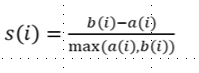        

In [4]:
filepath = './Online Retail.xlsx'
import pandas as pd
import numpy as np

In [5]:
retail_df = pd.read_excel(filepath)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [14]:
# retail_df['InvoiceNo'] 에서 숫자가 아닌 항목들 찾기
for i in retail_df['InvoiceNo']:
    if(not type(i) == int):
        print(i)
        break

C536379


In [15]:
#  InvoiceNo  C가 붙어 있으면 주문 취소

# 데이터 전처리
    결측치 처리
    이상치 처리
    타입을 통일
    스케일 조정
    중복데이터 제거
    - CustomerID는 정수형태  자료형을 정수형 
    - CustomerID가 없으면 제거,  Quantity UnitPrice 수량과 가격은 양수만 존재해야 함 그래서 혹시 음수가 있으면 제거

In [19]:
retail_df =  retail_df[retail_df['Quantity'] > 0]
retail_df =  retail_df[retail_df['UnitPrice'] > 0]

In [23]:
retail_df.isnull().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.000000
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249423
Country        0.000000
dtype: float64

In [29]:
retail_df.dropna(inplace=True)

In [30]:
retail_df.isnull().mean()

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [32]:
retail_df.shape

(397884, 8)

In [35]:
# 중복데이터 확인
retail_df[retail_df.duplicated()].head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom


In [36]:
retail_df.duplicated().sum()

5192

In [37]:
# 중복데이터 제거
retail_df.drop_duplicates(inplace=True)

In [38]:
retail_df.duplicated().sum()

0

In [39]:
retail_df.shape

(392692, 8)

# 분석용 데이터 추출
    제품 수, 거래건수, 고객 수 , 추가로 국적도 확인

In [ ]:
# 제품 수, 거래건수, 고객 수 항목에 대한 데이터 프레임 생성해서 확인
